<a href="https://www.kaggle.com/code/pranaii/e20-customised-css-eda-august-2?scriptVersionId=138800937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML 
HTML (""" 
 <link rel="stylesheet"
          href="https://fonts.googleapis.com/css?family=Open+Sans">
<style>

    h1, h2, h3, h4, h5, h6 {
     font-family: 'Open Sans', serif;
        background: linear-gradient(to right, #ff6a0d, #002cff);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        background-size: 400% 400%;
        animation: shine 10s linear infinite alternate-reverse;
    } 
    ul, ol {
        background: linear-gradient(0deg, #000000, #333c99);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent; 
     }

    body[data-jp-theme-light="true"] .jp-Notebook .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }
    
    jp-CodeConsole .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    div.input_area {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    @keyframes shine {
        0% { background-position: 0% 50%; }
        50% { background-position: 100% 50%; }
        100% { background-position: 0% 50%; }
    }

    @-webkit-keyframes shine {
            0% { background-position: 0% 50%;}
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%; }      
    }
    
    @-moz-keyframes shine {
            0% { background-position: 0% 50%; }
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%;}
    }
    
    div.input{
        max-width:fit-content !important;
    }
    
   div.text_cell_render {
      border: 3px solid #f000;
      border-radius: 2em;
      background: linear-gradient(#ffffff, #dee9ff) padding-box, linear-gradient(
            var(--angle),
            #ff6a0d,
            #687aff
          ) border-box;    
      width: fit-content;
      animation: 8s rotate linear infinite;
      padding: 16px 16px 16px 16px;

   }
    @keyframes rotate {
      to {
            --angle: 360deg;
          }
        }

    @property --angle {
      syntax: "<angle>";
      initial-value: 0deg;
      inherits: false;
    }
    

</style> """)

# Importing libraries & setting up the parameters

# Dataset Description

The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

- Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
- Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
- Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
- Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
- UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
- Ozone - COPERNICUS/S5P/NRTI/L3_O3
- Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 
import math, missingno as msno 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Reading the data

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
df_train

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019        0   
1      ID_-0.510_29.290_2019_01    -0.510     29.290  2019        1   
2      ID_-0.510_29.290_2019_02    -0.510     29.290  2019        2   
3      ID_-0.510_29.290_2019_03    -0.510     29.290  2019        3   
4      ID_-0.510_29.290_2019_04    -0.510     29.290  2019        4   
...                         ...       ...        ...   ...      ...   
79018  ID_-3.299_30.301_2021_48    -3.299     30.301  2021       48   
79019  ID_-3.299_30.301_2021_49    -3.299     30.301  2021       49   
79020  ID_-3.299_30.301_2021_50    -3.299     30.301  2021       50   
79021  ID_-3.299_30.301_2021_51    -3.299     30.301  2021       51   
79022  ID_-3.299_30.301_2021_52    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                           NaN   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   
79020                                       NaN   
79021                                 -0.000034   
79022                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                               NaN   
4                                          0.676296   
...                                             ...   
79018                                      1.195643   
79019                                      1.130868   
79020                                           NaN   
79021                                      0.879397   
79022                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                                 NaN   
4                                           -0.000048   
...                                               ...   
79018                                        0.000340   
79019                                        0.000063   
79020                                             NaN   
79021                                       -0.000028   
79022                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                                NaN                                  NaN   
4                           0.121164                             4.121269   
...                              ...                                  ...   
79018                       0.191313                            72.820518   
79019                       0.177222                           -12.856753   
79020                            NaN                                  NaN   
79021                       0.184209                          -100.344827   
79022                       0.000000                            76.825638   

       ...  Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
0      ...             3664.436218               61085.809570   
1      ...             3651.190311               66969.478735   
2      ...             4216.986492               60068.894448   
3      ...    

## 1.1 Data types & Statistics of the data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

### Observations
- We can see latitude and longitude, so we can use maps to better visualization
- We can also see week + year, need to figure out what is the time period from start to the end.
- ID is the combination of 4 columns: latitude, longitude, year & week. We can remove it as it is a unique column.
- We can see few pollutants/chemicals like SO2, CO, NO2, Formaldehyde, UVAerosol, O3 etc
    - For each of these, we again have few properties like azimuth angle, zenith angle etc. Need to understand what is that?
- All the columns are float except week & year.
- Total count is 79023, but in many columns we see lots of missing values. Let's plot them.

In [5]:
df_train['ID_LAT_LON_YEAR_WEEK'].nunique()

79023

### Finding # missing values column-wise

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Column - % of non-null values')

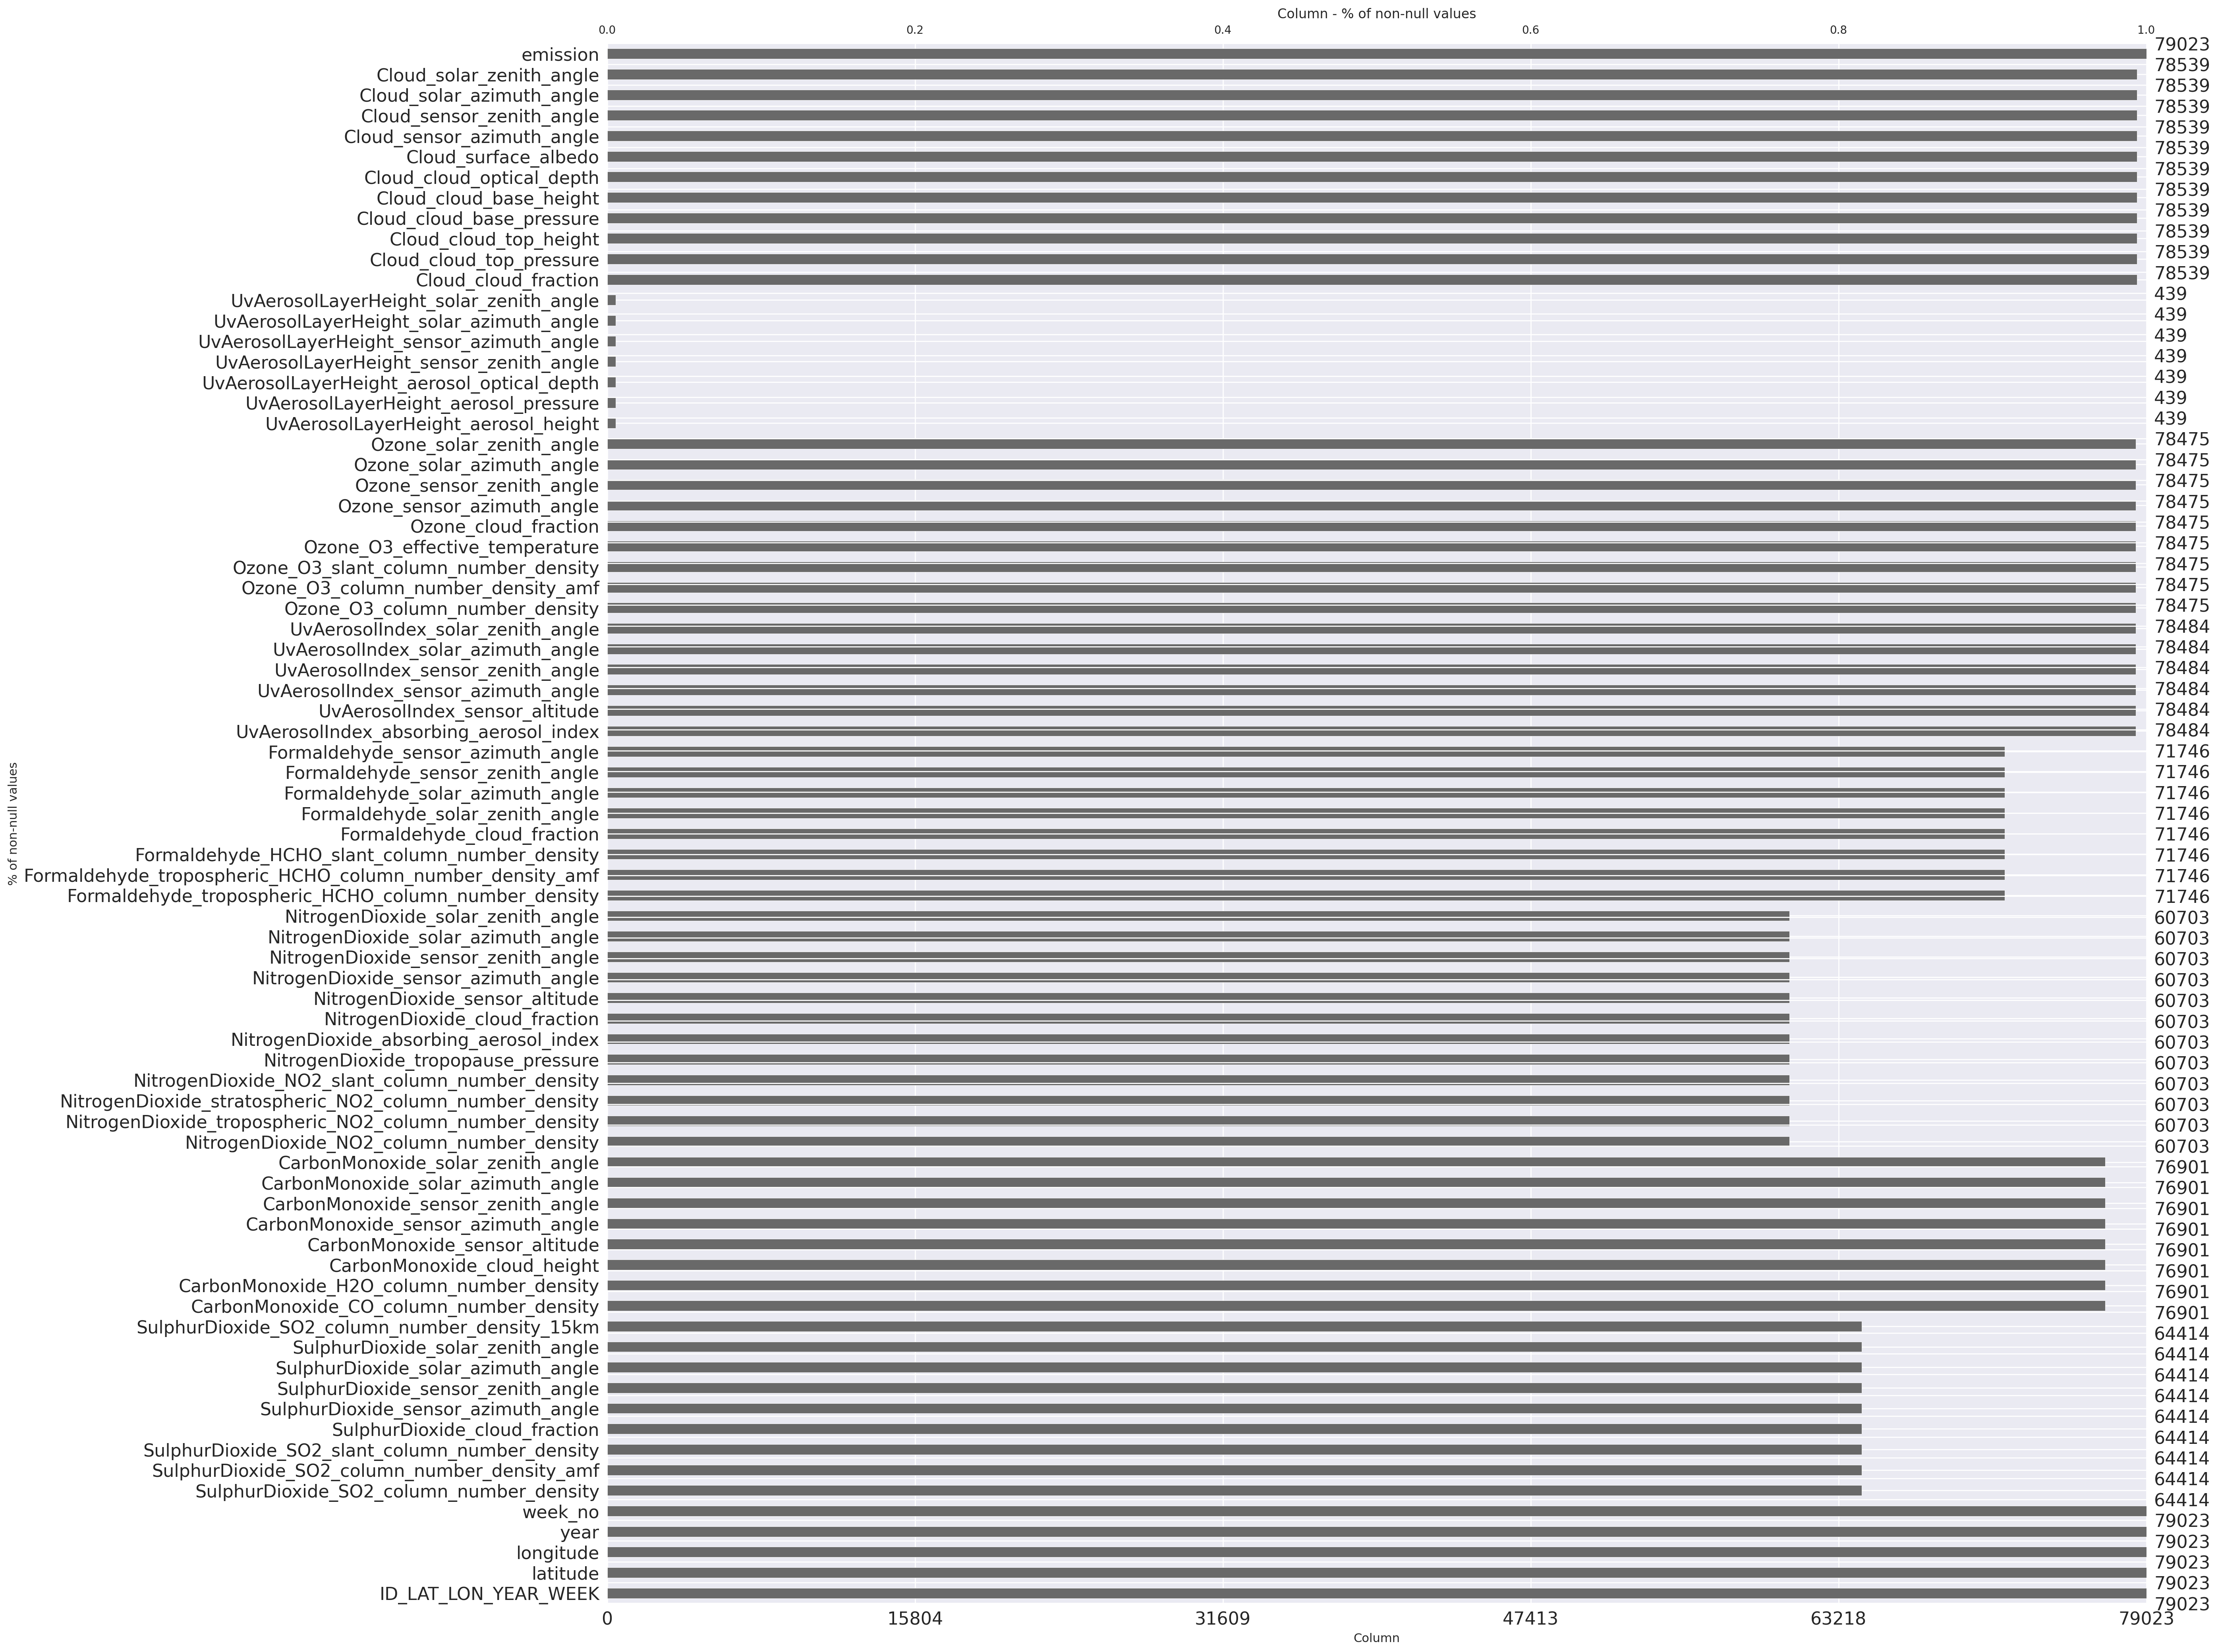

In [6]:
ax = msno.bar(df_train)
ax.set_xlabel("Column")
ax.set_ylabel("% of non-null values")
ax.set_title("Column - % of non-null values")

In [7]:
df_train.apply(lambda x : x.count()) 

ID_LAT_LON_YEAR_WEEK          79023
latitude                      79023
longitude                     79023
year                          79023
week_no                       79023
                              ...  
Cloud_sensor_azimuth_angle    78539
Cloud_sensor_zenith_angle     78539
Cloud_solar_azimuth_angle     78539
Cloud_solar_zenith_angle      78539
emission                      79023
Length: 76, dtype: int64

In [8]:
(df_train.apply(lambda x : x.count()) == df_train.shape[0])

ID_LAT_LON_YEAR_WEEK           True
latitude                       True
longitude                      True
year                           True
week_no                        True
                              ...  
Cloud_sensor_azimuth_angle    False
Cloud_sensor_zenith_angle     False
Cloud_solar_azimuth_angle     False
Cloud_solar_zenith_angle      False
emission                       True
Length: 76, dtype: bool

In [9]:
(df_train.apply(lambda x : x.count()) == df_train.shape[0]).sum()

6

### We only see 6 columns that have NO missing values

## We have to deal with the missing values

## Statistics 

In [10]:
df_train.describe(include=['float']).T

count       mean  \
latitude                                        79023.0  -1.891072   
longitude                                       79023.0  29.880155   
SulphurDioxide_SO2_column_number_density        64414.0   0.000048   
SulphurDioxide_SO2_column_number_density_amf    64414.0   0.834848   
SulphurDioxide_SO2_slant_column_number_density  64414.0   0.000035   
...                                                 ...        ...   
Cloud_sensor_azimuth_angle                      78539.0 -10.784832   
Cloud_sensor_zenith_angle                       78539.0  40.436976   
Cloud_solar_azimuth_angle                       78539.0 -86.800583   
Cloud_solar_zenith_angle                        78539.0  27.925981   
emission                                        79023.0  81.940552   

                                                       std         min  \
latitude                                          0.694522   -3.299000   
longitude                                         0.810375   28.228000   
SulphurDioxide_SO2_column_number_density          0.000272   -0.000996   
SulphurDioxide_SO2_column_number_density_amf      0.185382    0.241822   
SulphurDioxide_SO2_slant_column_number_density    0.000206   -0.000887   
...                                                    ...         ...   
Cloud_sensor_azimuth_angle                       30.374462 -102.739731   
Cloud_sensor_zenith_angle                         6.428216    2.998873   
Cloud_solar_azimuth_angle                        37.837269 -153.464211   
Cloud_solar_zenith_angle                          4.403835   10.818288   
emission                                        144.299648    0.000000   

                                                       25%        50%  \
latitude                                         -2.451000  -1.882000   
longitude                                        29.262000  29.883000   
SulphurDioxide_SO2_column_number_density         -0.000096   0.000024   
SulphurDioxide_SO2_column_number_density_amf      0.705817   0.809118   
SulphurDioxide_SO2_slant_column_number_density   -0.000078   0.000019   
...                                                    ...        ...   
Cloud_sensor_azimuth_angle                      -30.309170 -12.673914   
Cloud_sensor_zenith_angle                        35.829907  41.119630   
Cloud_solar_azimuth_angle                      -125.991158 -84.644352   
Cloud_solar_zenith_angle                         24.686763  28.333630   
emission                                          9.797995  45.593445   

                                                       75%          max  
latitude                                         -1.303000    -0.510000  
longitude                                        30.471000    31.532000  
SulphurDioxide_SO2_column_number_density          0.000153     0.004191  
SulphurDioxide_SO2_column_number_density_amf      0.942792     1.885239  
SulphurDioxide_SO2_slant_column_number_density    0.000121     0.004236  
...                                                    ...          ...  
Cloud_sensor_azimuth_angle                        9.402202    78.223037  
Cloud_sensor_zenith_angle                        44.446272    65.951248  
Cloud_solar_azimuth_angle                       -48.132701   -22.653170  
Cloud_solar_zenith_angle                         31.499883    42.060436  
emission                                        109.549595  3167.768000  

[73 rows x 8 columns]

### Plotting latitude and longitude

/tmp/ipykernel_32/2494170538.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

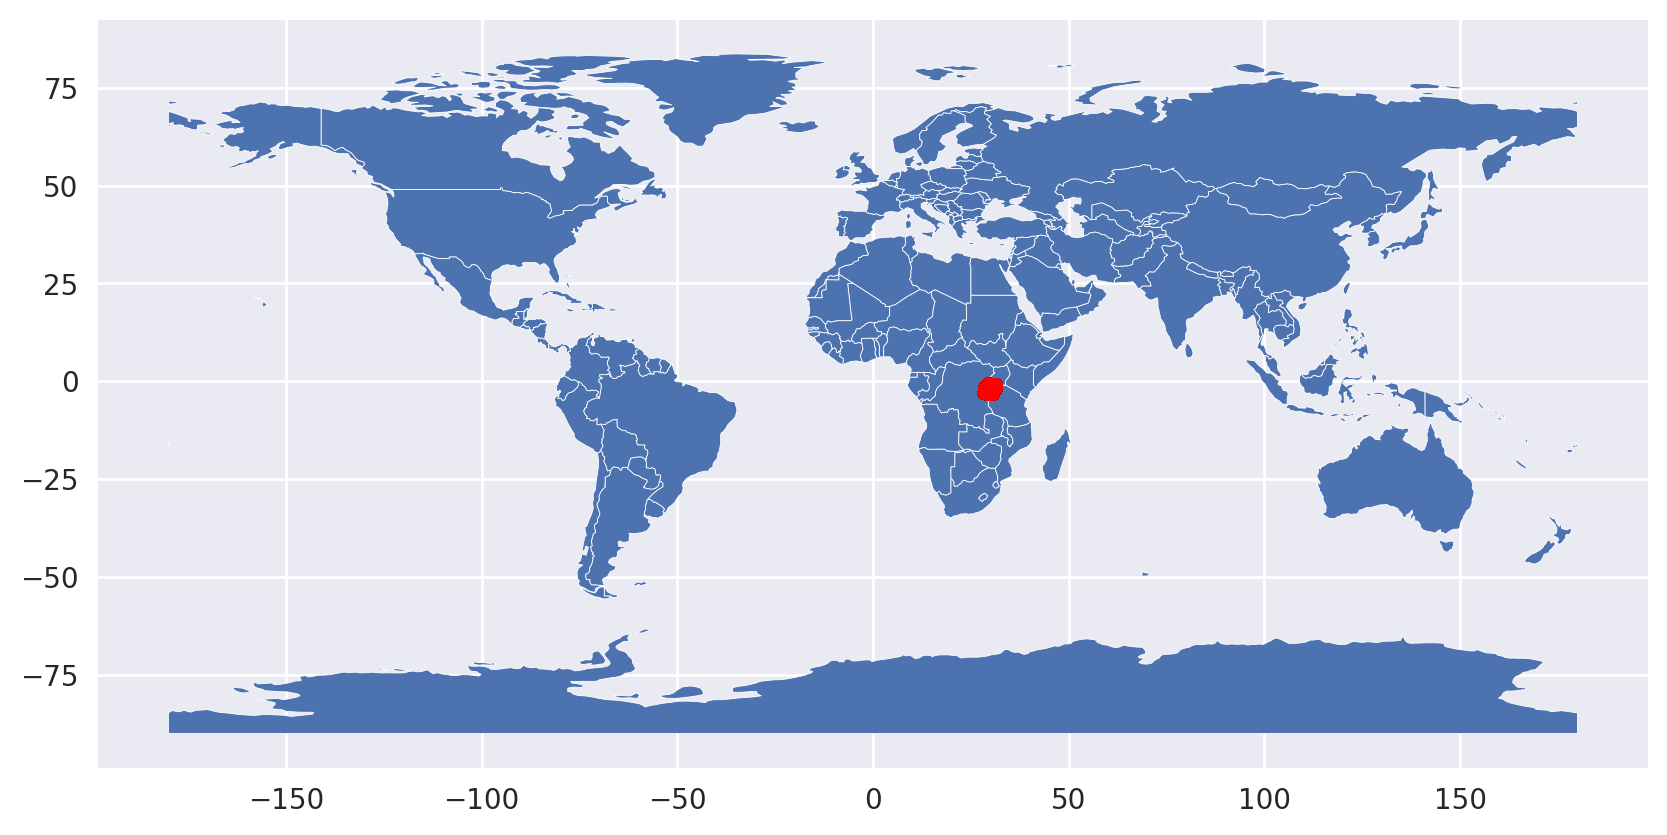

In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(df_train['longitude'], df_train['latitude'])]
gdf = GeoDataFrame(df_train, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

### Since we see only a specific area, whole of the world map isn't required. 

In [12]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_train, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="ID_LAT_LON_YEAR_WEEK", 
                        hover_data=["ID_LAT_LON_YEAR_WEEK"],
                        color="emission",
                        color_continuous_scale=color_scale,
                        size="emission",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")

### Exploring target

In [13]:
def plot_hist_box_violin(dataframe, column):
    fig, (ax_box, ax_hist, ax_violin) = plt.subplots(
        3,
        1,
        figsize=(10, 6),
        sharex='col',
        gridspec_kw={"height_ratios": (.2, .5, .2)})
    sns.boxplot(data=dataframe, x=column, ax=ax_box)
    sns.histplot(data=dataframe,
                 x=column,
                 kde=True,
                 ax=ax_hist,
                 legend=False)
    sns.rugplot(data=dataframe, x=column, ax=ax_hist)
    sns.violinplot(data=dataframe, x=column, ax=ax_violin)
    plt.tight_layout()

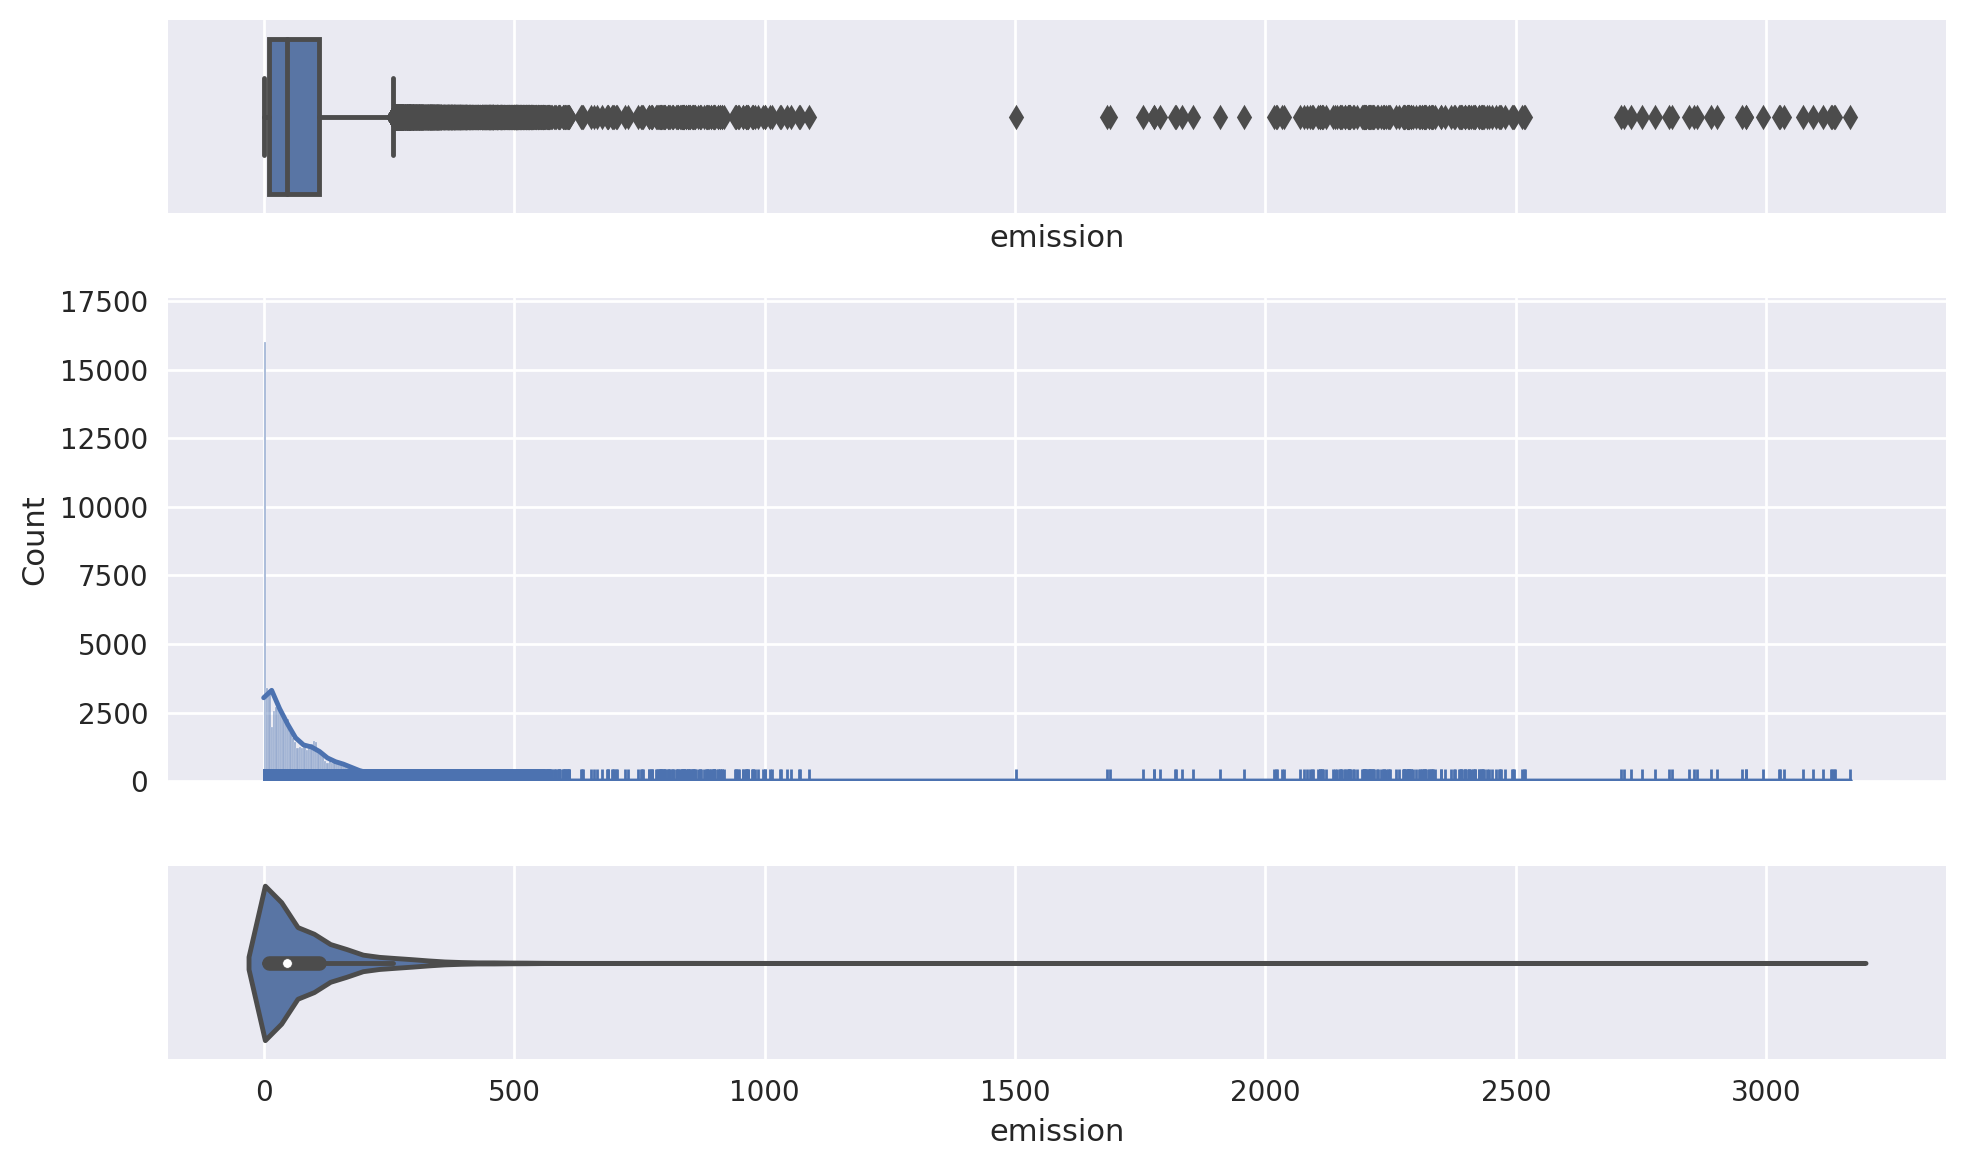

In [14]:
plot_hist_box_violin(df_train, 'emission')


- We see lots of outliers.

# To do - In future versions